<a href="https://colab.research.google.com/github/ab17254/ce802/blob/main/CE802_P2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving CE802_P2_Data.csv to CE802_P2_Data.csv
Saving CE802_P2_Test.csv to CE802_P2_Test.csv
User uploaded file "CE802_P2_Data.csv" with length 119990 bytes
User uploaded file "CE802_P2_Test.csv" with length 113062 bytes


In [3]:
data = pd.read_csv('/content/CE802_P2_Data.csv')
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,11.7,4.02,-4.34,9.90,29.79,89.58,0.63,23,10.35,158.56,-7.88,0.03,1,1.96,NaN,False
1,11.7,4.20,-3.68,10.98,17.46,179.58,0.05,11,8.30,110.56,-3.10,0.84,1,1.50,NaN,False
2,37.7,25.80,3.60,0.48,12.24,407.58,-0.29,230,4.06,254.56,6.68,21.60,10,7.63,NaN,True
3,7.7,5.40,0.30,9.42,19.86,119.58,0.29,12,7.61,66.56,-1.84,1.05,1,2.27,12.17,True
4,15.7,5.58,-2.58,16.34,17.49,146.58,-0.64,25,9.86,106.56,-4.36,1.68,1,1.28,NaN,False


In [4]:
data.dtypes

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6       float64
F7       float64
F8         int64
F9       float64
F10      float64
F11      float64
F12      float64
F13        int64
F14      float64
F15      float64
Class       bool
dtype: object

In [5]:
cleanup = {'Class': {False: 0, True:1}}
data.replace(cleanup, inplace=True)
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,11.7,4.02,-4.34,9.90,29.79,89.58,0.63,23,10.35,158.56,-7.88,0.03,1,1.96,NaN,0
1,11.7,4.20,-3.68,10.98,17.46,179.58,0.05,11,8.30,110.56,-3.10,0.84,1,1.50,NaN,0
2,37.7,25.80,3.60,0.48,12.24,407.58,-0.29,230,4.06,254.56,6.68,21.60,10,7.63,NaN,1
3,7.7,5.40,0.30,9.42,19.86,119.58,0.29,12,7.61,66.56,-1.84,1.05,1,2.27,12.17,1
4,15.7,5.58,-2.58,16.34,17.49,146.58,-0.64,25,9.86,106.56,-4.36,1.68,1,1.28,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,37.7,33.90,5.80,6.62,10.71,362.58,-1.52,165,5.52,444.56,-1.96,15.30,10,6.93,8.76,0
1496,17.7,29.40,8.00,-0.48,3.54,-102.42,1.17,100,3.76,304.56,6.78,29.25,10,7.53,12.19,1
1497,11.7,2.13,-0.92,12.12,22.65,95.58,-0.57,10,8.47,76.56,-4.76,2.34,1,1.89,NaN,1
1498,11.7,2.94,0.64,11.68,17.49,146.58,1.47,20,8.57,116.56,-5.00,2.67,1,1.48,11.55,0


In [6]:
data['F15'].fillna(data['F15'].mean(), inplace=True)

(array([  9.,  19.,  69., 101., 135., 879., 116.,  98.,  52.,  22.]),
 array([ 8.13 ,  8.638,  9.146,  9.654, 10.162, 10.67 , 11.178, 11.686,
        12.194, 12.702, 13.21 ]),
 <a list of 10 Patch objects>)

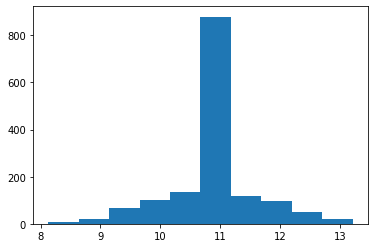

In [7]:
plt.hist(x=data['F15'])

In [8]:
x = data.loc[:, data.columns != 'Class'].to_numpy()
y = data.loc[:, 'Class'].to_numpy()
print(x.shape, y.shape)

(1500, 15) (1500,)


In [9]:
np.sum(np.isnan(x), 0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
x[:, 14]

array([10.85301333, 10.85301333, 10.85301333, ..., 10.85301333,
       11.55      , 10.41      ])

In [11]:
y

array([0, 0, 1, ..., 1, 0, 0])

In [12]:
k_fold = KFold(n_splits=750)
for train_indices, test_indices in k_fold.split(x):
    # imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    # imputer = imputer.fit(x[:, 0:14])
    # x[:, 0:14] = imputer.transform(x[:, 0:14])
    # mean = np.nanmean(x[train_indices, 1])
    # x[np.isnan(x[:,1]), 1] = mean

    ss = StandardScaler()
    ss.fit(x[train_indices, :])
    x_train = ss.transform(x[train_indices, :])
    x_test = ss.transform(x[test_indices, :])



In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

In [21]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[173  32]
 [ 44 126]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       205
           1       0.80      0.74      0.77       170

    accuracy                           0.80       375
   macro avg       0.80      0.79      0.79       375
weighted avg       0.80      0.80      0.80       375

